In [32]:
import li
import li.analysis as la
import li.EvaluationHelpers as eh

import os
import numpy as np
import matplotlib.pyplot as plt


# Data Loading and Definition of Variables

In [33]:
# path to images
images_set = "B-inSitu_hot_imaging_750"

path_dir = "Z:/Archiv/2D/Experiment/2025/20250226/Images20250226/" + images_set + "/"
path_file = os.listdir(path_dir)

print(len(path_file))

250


In [34]:
# grab loop variable names
variables = la.loop_variables(path_dir + path_file[0])[1]
var_vals = la.loop_variables(path_dir + path_file[0])[0]

In [35]:
print(variables)
print(var_vals)

['i']
[array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])]


In [36]:
# experiment variables loaded from experiment control
info = la.GetImageMetadata(path_dir + path_file[0])
info_sorted = dict(sorted(info[0].items(), key=lambda x: x[0].lower()))
# info_sorted

# Image Processing

In [37]:
%%time
# create initial dictionary with all raw images
images_raw = eh.createImageInfoList([path_dir], variables)

CPU times: total: 0 ns
Wall time: 28.6 ms


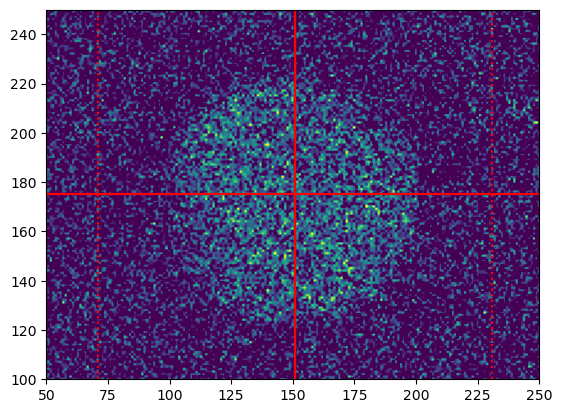

In [38]:
# determine optimal ROI
center = (175, 151)
h = 80
w = 80

single_prc = la.density_builder([images_raw[0]], variables, center, h, w, info_sorted["Csat"], info_sorted["Img_Illumination_Time"], progress_disable = True)

plt.imshow(single_prc.iloc[0]["density"].data, vmin = 0, vmax = 3, cmap = "viridis")

# circle = plt.Circle((center[1], center[0]), 50, color='r', fill=False, lw = 2)
# plt.gca().add_artist(circle)

plt.xlim(50, 250)
plt.ylim(100, 250)


plt.axhline(center[0], c = "red")
plt.axhline(center[0] - h, c = "red", ls = ":")
plt.axhline(center[0] + h, c = "red", ls = ":")

plt.axvline(center[1], c = "red")
plt.axvline(center[1] - w, c = "red", ls = ":")
plt.axvline(center[1] + w, c = "red", ls = ":")


plt.show()

In [39]:
%%time
# calculate all density images and apply mask
images_prc = la.density_builder(images_raw, variables, center, h, w, info_sorted["Csat"], info_sorted["Img_Illumination_Time"], progress_disable = False)

|████████████████████████████████████████| 50/50 [100%] in 8.9s (5.61/s)        
CPU times: total: 4.73 s
Wall time: 8.93 s


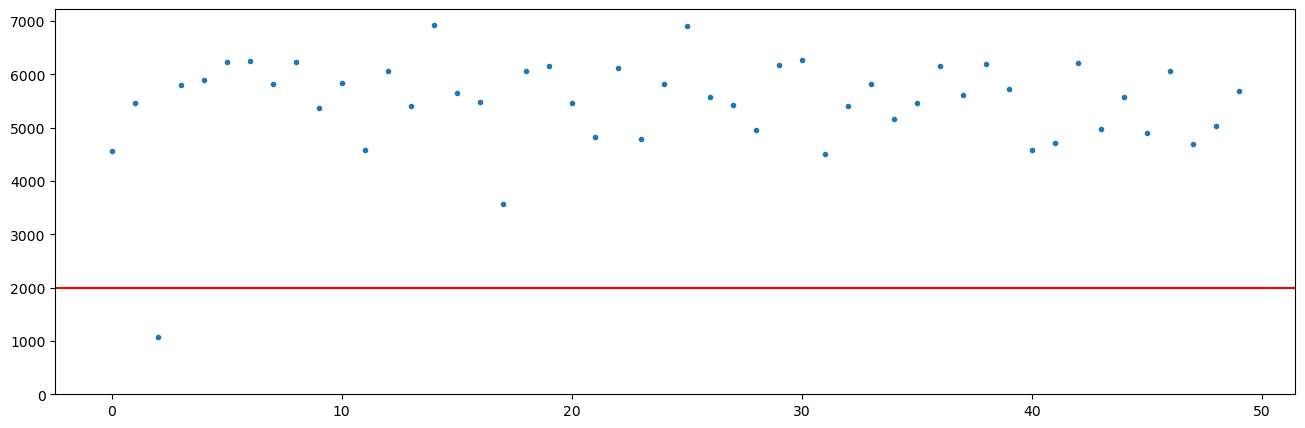

In [40]:
# filter out missed shots
bol = []

for var in var_vals[0]:

    for i, im in images_prc[images_prc["i"] == var].iterrows():
        bol.append(np.sum(im["density"].compressed()))

plt.figure(figsize = (16, 5))

plt.plot(bol, ".")
plt.axhline(2000, c = "r")

plt.ylim(0, None)

plt.show()

In [41]:
%%time
# filter missed shots
images_fil = la.filter(images_prc, 0)

CPU times: total: 31.2 ms
Wall time: 34.2 ms


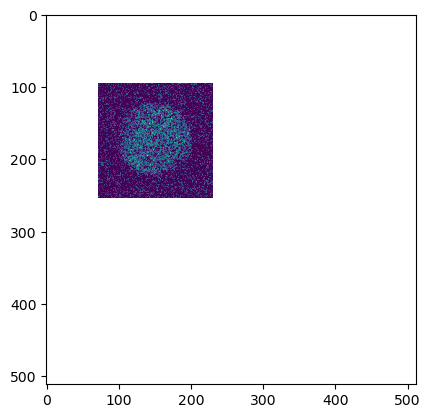

In [42]:
plt.imshow(images_fil.iloc[0]["density"], vmin = 0, vmax = 3, cmap = "viridis")
plt.show()

In [43]:
%%time
# group by loop variables and average over iterations
images_grp = la.group(images_fil, variables, "i")

CPU times: total: 609 ms
Wall time: 629 ms


In [44]:
images_grp

,density,atoms,bright,atoms_var,bright_var,fringe_var,number_var
0,"[[--, --, --, --, --, --, --, --, --, --, --, ...","[[--, --, --, --, --, --, --, --, --, --, --, ...","[[--, --, --, --, --, --, --, --, --, --, --, ...","[[--, --, --, --, --, --, --, --, --, --, --, ...","[[--, --, --, --, --, --, --, --, --, --, --, ...","[[--, --, --, --, --, --, --, --, --, --, --, ...","[[--, --, --, --, --, --, --, --, --, --, --, ..."


# Visualization

In [45]:
# length = len(images_grp)//2
#
# for i in range(length):
#
#     # state 1
#     # print("n1")
#     # plt.imshow(images_grp["density"].iloc[i])
#     # plt.xlim(center[1] - w, center[1] + w)
#     # plt.ylim(center[0] - h, center[0] + h)
#     # plt.show()
#
#     # state 2
#     # print("n2")
#     # plt.imshow(images_grp["density"].iloc[length + i])
#     # plt.xlim(center[1] - w, center[1] + w)
#     # plt.ylim(center[0] - h, center[0] + h)
#     # plt.show()
#
#     # difference
#     print(f"n1 - n2, TOF: {images_grp["TOF"].iloc[i]} s")
#     plt.imshow(images_grp["density"].iloc[i] - images_grp["density"].iloc[length + i])
#     plt.xlim(center[1] - w, center[1] + w)
#     plt.ylim(center[0] - h, center[0] + h)
#     plt.show()
#
#     print("")

In [46]:
# heat = images_res.pivot(index="Acc_heat_freq", columns="RF23_Sweep_Rate", values="response")
# heat_run = images_res.pivot(index="Acc_heat_freq", columns="RF23_Sweep_Rate", values="response_run")
#
# plt.plot(heat[70], ".")
# plt.plot(heat_run[70], ".")
#
# plt.ylim(None, 2)
#
# plt.show()

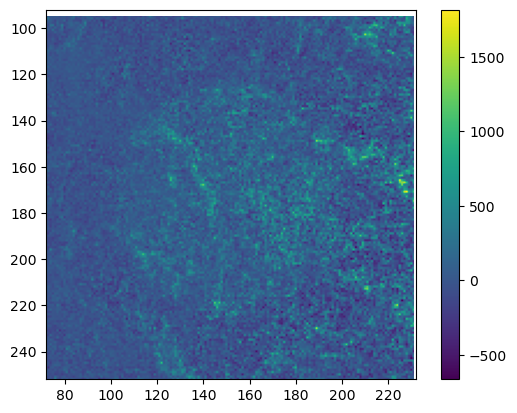

In [47]:
plt.imshow(images_grp["atoms_var"].iloc[0] - images_grp["atoms"].iloc[0], cmap = "viridis")
plt.colorbar()

center = (172, 152)
h = 80
w = 80

plt.xlim(center[1] - w, center[1] + w)
plt.ylim(center[0] + h, center[0] - h)

plt.show()

In [48]:
def circ_ring(r, image_sizes, ring_position):
    '''
    This function creates an image (2D numpy array) of a ring with radius r
    Input:
        r: radius of the circle
        image_sizes: tuple (image_size_x, image_size_y) of image sizes in x/y direction
        ring_position: tuple (pos_x, pos_y), coordinates of the center of the ring (the point (0,0) is in the top left corner)
    Output:
        - ring mask (2D numpy array) with ones/True in the ring and zeros/False outside of the ring
    '''
    image_size_x, image_size_y = image_sizes
    pos_x, pos_y = ring_position

    x = np.arange(0, image_size_x)
    y = np.arange(0, image_size_y)

    r_x, r_y = np.meshgrid(x,y)

    # Mask 1 is the inverse of a circle with radius r
    # Mask 2 is a circle with radius r+1
    mask1 = (r_x-pos_x)**2 + (r_y-pos_y)**2 >= r**2
    mask2 = (r_x-pos_x)**2 + (r_y-pos_y)**2 < (r + 1)**2

    return mask2*mask1 # the overlap of the two masks is a ring

In [49]:
def radial_average(image, averaging_midpoint):
    '''
    This function takes an image (2D numpy array) and calculates its radial average (1D numpy array).
    For plotting one should use the return on the y-axis and radial_axis on the x-axis.
    This function does not control if a radius lies partially outside of the image
    Input:
        image:
        averaging_midpoint: tuple (midpoint_x, midpoint_y), that determines the central point of the radial average (the point (0,0) is in the top left corner)
    Output:
        radial_axis: x-axis to plot the radial_average using e.g. matplotlib.pyplot.plot()
        radial_average:
    '''

    image_sizes = (np.shape(image))[::-1]  # tuple (image_size_x, image_size_y)

    radial_axis = np.arange(0, image_sizes[0]//2)
    radial_sum = np.zeros(image_sizes[0]//2)
    radial_N = np.zeros(image_sizes[0]//2)

    for r in radial_axis:


        radial_sum[r] = np.sum(image * circ_ring(r, image_sizes, averaging_midpoint))  # summed signal at radius r
        radial_N[r] = np.sum(circ_ring(r, image_sizes, averaging_midpoint))   # Number of pixels at radius r

    radial_average = radial_sum/radial_N

    return radial_axis, radial_average

In [50]:
def circ_mask(r, image_sizes, circle_position):
    '''
    This function creates an image (2D numpy array) of a circle with radius r
    Input:
        r: radius of the circle
        image_sizes: tuple (image_size_x, image_size_y) of image_sizes in number of pixels
        circle_position: tuple (pos_x, pos_y)  of the center coordinate of the circle (the point (0,0) is in the top left corner )
    Output:
        - circular mask with ones/True in the circle and zeros/False outside of the circle
    '''
    image_size_x, image_size_y = image_sizes
    pos_x, pos_y = circle_position

    x = np.arange(0, image_size_x)
    y = np.arange(0, image_size_y)

    r_x, r_y = np.meshgrid(x,y)       # r_x, r_y assign to each pixel its x, y coordinate


    mask = (r_x - pos_x)**2 + (r_y - pos_y)**2 <= r**2    # the circle equation is used here

    return mask

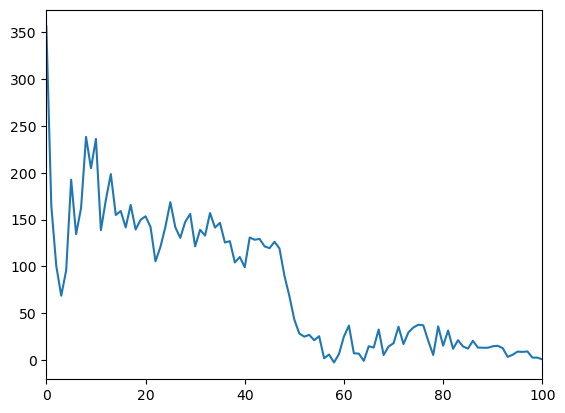

In [51]:
a = radial_average(images_grp["atoms_var"].iloc[0] - images_grp["atoms"].iloc[0], (center[1], center[0]))
plt.plot(a[0], a[1])

plt.xlim(0, 100)

plt.show()

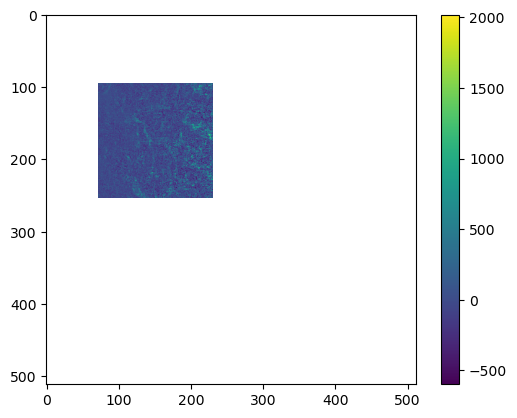

In [52]:
plt.imshow(images_grp["fringe_var"].iloc[0])
plt.colorbar()

(0.0, 100.0)

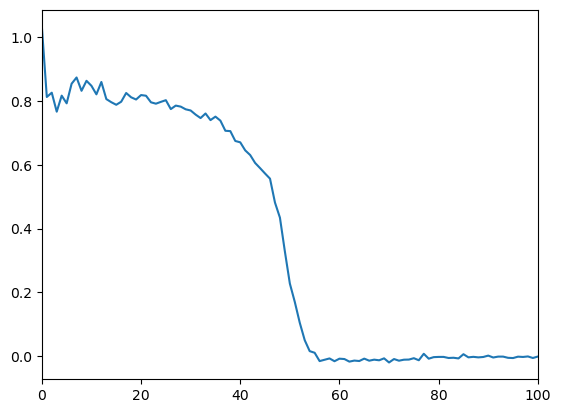

In [55]:
number = radial_average(images_grp["density"].iloc[0], (center[1], center[0]))
number_var = radial_average(images_grp["number_var"].iloc[0], (center[1], center[0]))
plt.plot(number[0], number[1])
# plt.plot(number_var[0], number_var[1])
plt.xlim(0, 100)